In [ ]:
Modeling Energy Output vs. Ambient Air Temperature

Objective: Model the relationship between ambient air temperature (X) and energy output (Y) of a combined cycle power plant.

Goal: Understand how temperature affects energy output and predict future energy outputs based on temperature.

Hypotheses
    Null Hypothesis (H_0): There is no significant relationship between ambient air temperature and energy output.
    Alternative Hypothesis (H_1): There is a significant relationship between ambient air temperature and energy output.

In [1]:
# Setup: Import Libraries and Load Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Configure Jupyter Notebook for inline plotting
%matplotlib inline

# Load the dataset
data = pd.read_csv('powerplant.csv')

# Display basic information about the dataset
print("<class 'pandas.core.frame.DataFrame'>")
print(data.info())
print("\nSummary Statistics:")
display(data.describe())

# Compute and display the correlation coefficient
correlation = data['x'].corr(data['y'])
print(f'\nCorrelation between Temperature and Energy Output: {correlation:.2f}')


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       9568 non-null   float64
 1   y       9568 non-null   float64
dtypes: float64(2)
memory usage: 149.6 KB
None

Summary Statistics:


,x,y
count,9568.000000,9568.000000
mean,19.651231,454.365009
std,7.452473,17.066995
min,1.810000,420.260000
25%,13.510000,439.750000
50%,20.345000,451.550000
75%,25.720000,468.430000
max,37.110000,495.760000



Correlation between Temperature and Energy Output: -0.95


Selected Data Points (Original Index 20 to 39):


,x,y,original_index
0,14.90,464.82,20
1,33.80,427.28,21
2,25.37,441.76,22
3,7.29,474.71,23
4,13.55,467.21,24
5,6.39,487.69,25
6,26.64,438.67,26
7,7.84,485.66,27
8,21.82,452.16,28
9,27.17,429.87,29


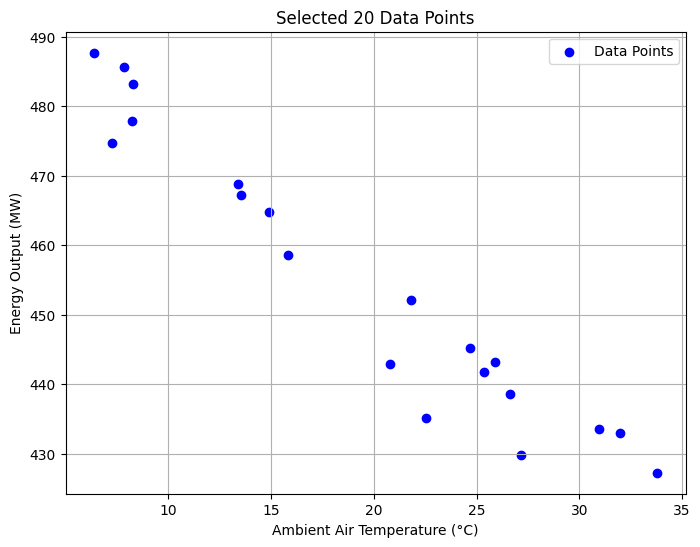

In [2]:
# Task 1: Select and Graph 20 Data Points for Regression

# Define your group number here
n = 1  # Replace with your actual group number

# Calculate the starting and ending indices
start_index = 20 * n
end_index = start_index + 20

# Ensure that the indices do not exceed the dataset bounds
if end_index > len(data):
    print(f"End index {end_index} exceeds dataset length {len(data)}. Adjusting to dataset size.")
    end_index = len(data)

# Select the subset of 20 data points
subset = data.iloc[start_index:end_index].copy()

# Add a column for the original indices for verification
subset['original_index'] = data.index[start_index:end_index]

# Reset the index of the subset DataFrame
subset.reset_index(drop=True, inplace=True)

# Display the selected subset with original indices
print(f"Selected Data Points (Original Index {start_index} to {end_index - 1}):")
display(subset)

# Graph the selected data points
plt.figure(figsize=(8, 6))
plt.scatter(subset['x'], subset['y'], color='blue', label='Data Points')
plt.title('Selected 20 Data Points')
plt.xlabel('Ambient Air Temperature (°C)')
plt.ylabel('Energy Output (MW)')
plt.legend()
plt.grid(True)
plt.show()


Transformed Data (Z-Score Normalization):


,x,y,original_index
0,-0.510028,0.521052,20
1,1.646707,-1.388106,21
2,0.684735,-0.651702,22
3,-1.378427,1.024024,23
4,-0.664080,0.642599,24
5,-1.481129,1.684142,25
6,0.829658,-0.808849,26
7,-1.315665,1.580904,27
8,0.279634,-0.122793,28
9,0.890138,-1.256387,29


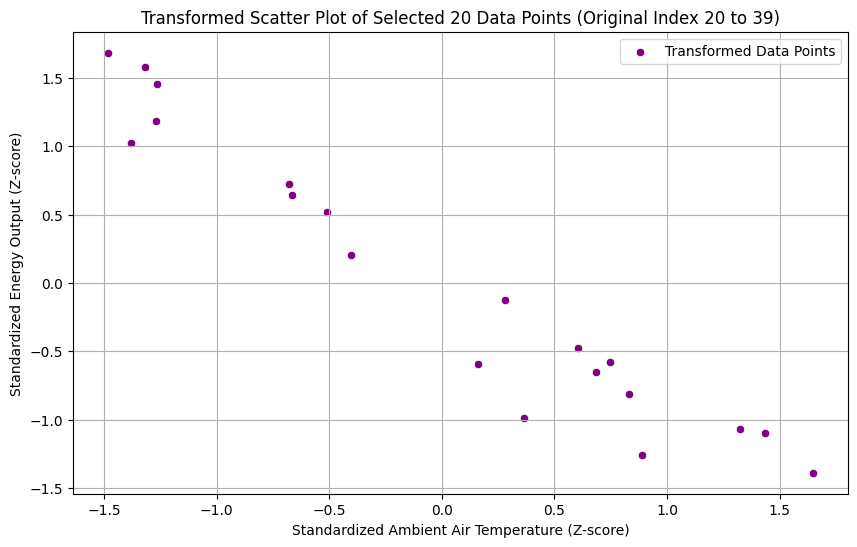

Summary Statistics of Transformed Data:
                  x             y  original_index
count  2.000000e+01  2.000000e+01        20.00000
mean  -2.442491e-16 -1.193490e-16        29.50000
std    1.025978e+00  1.025978e+00         5.91608
min   -1.481129e+00 -1.388106e+00        20.00000
25%   -8.252647e-01 -8.537301e-01        24.75000
50%    2.197244e-01 -2.982487e-01        29.50000
75%    7.671812e-01  7.993644e-01        34.25000
max    1.646707e+00  1.684142e+00        39.00000


In [3]:
# Task 2: Perform Data Transformation (Z-Score Normalization)

# Initialize the StandardScaler
scaler = StandardScaler()

# Select the features to be transformed
features = ['x', 'y']

# Fit the scaler to the data and transform
subset_scaled = subset.copy()
subset_scaled[features] = scaler.fit_transform(subset[features])

# Display the transformed data
print("Transformed Data (Z-Score Normalization):")
display(subset_scaled)

# Plot the transformed data points
plt.figure(figsize=(10, 6))
sns.scatterplot(x='x', y='y', data=subset_scaled, color='purple', label='Transformed Data Points')

plt.title(f'Transformed Scatter Plot of Selected 20 Data Points (Original Index {start_index} to {end_index - 1})')
plt.xlabel('Standardized Ambient Air Temperature (Z-score)')
plt.ylabel('Standardized Energy Output (Z-score)')
plt.legend()
plt.grid(True)
plt.show()

# Optional: Display summary statistics of the transformed data
print("Summary Statistics of Transformed Data:")
print(subset_scaled.describe())


Computed Coefficients using Closed-Form Solution:
Intercept (b): -0.0000
Slope (a): -0.9660


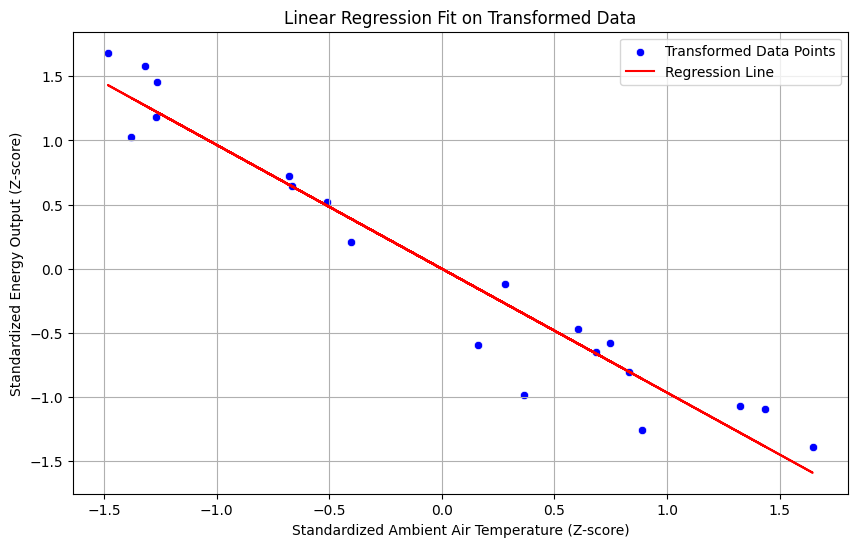

In [4]:
# Task 3: Compute Linear Regression Coefficients Using Closed-Form Solution

# Extract X and Y from the transformed data
X = subset_scaled['x'].values.reshape(-1, 1)  # Predictor
Y = subset_scaled['y'].values.reshape(-1, 1)  # Response

# Add a column of ones to X to account for the intercept term
X_b = np.hstack([np.ones((X.shape[0], 1)), X])  # Shape: (20, 2)

# Compute the coefficients using the Normal Equation
# theta_best = (X_b^T * X_b)^(-1) * X_b^T * Y
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)

# Extract intercept (b) and slope (a)
b = theta_best[0][0]
a = theta_best[1][0]

# Print the coefficients
print(f"Computed Coefficients using Closed-Form Solution:")
print(f"Intercept (b): {b:.4f}")
print(f"Slope (a): {a:.4f}")

# Predict Y values using the computed coefficients
Y_pred = X_b.dot(theta_best)

# Plot the transformed data points and the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='x', y='y', data=subset_scaled, color='blue', label='Transformed Data Points')

# Plot the regression line
plt.plot(X, Y_pred, color='red', label='Regression Line')

plt.title('Linear Regression Fit on Transformed Data')
plt.xlabel('Standardized Ambient Air Temperature (Z-score)')
plt.ylabel('Standardized Energy Output (Z-score)')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
# Task 4: Choose a Cost Function for a Linear Regression Model

# Number of training examples
m = len(Y)

# Define the Mean Squared Error (MSE) cost function
def compute_cost(a, b, X, Y):
    """
    Compute the Mean Squared Error cost.
    
    Parameters:
    a (float): Slope of the regression line.
    b (float): Intercept of the regression line.
    X (numpy.ndarray): Predictor variables.
    Y (numpy.ndarray): Response variables.
    
    Returns:
    float: The MSE cost.
    """
    predictions = a * X + b
    errors = predictions - Y
    cost = (1 / m) * np.sum(errors ** 2)
    return cost

# Define the partial derivatives of the MSE cost function
def compute_gradients(a, b, X, Y):
    """
    Compute the partial derivatives of the MSE cost function with respect to a and b.
    
    Parameters:
    a (float): Current slope.
    b (float): Current intercept.
    X (numpy.ndarray): Predictor variables.
    Y (numpy.ndarray): Response variables.
    
    Returns:
    tuple: Partial derivatives (da, db).
    """
    predictions = a * X + b
    errors = predictions - Y
    da = (2 / m) * np.sum(X * errors)
    db = (2 / m) * np.sum(errors)
    return da, db

# Example: Compute cost and gradients with current parameters
# Assuming initial parameters are already set (from Task 3)
a_current = a  # Slope from Task 3
b_current = b  # Intercept from Task 3

# Compute the current cost
current_cost = compute_cost(a_current, b_current, X, Y)
print(f"Current Cost with a = {a_current:.4f}, b = {b_current:.4f}: {current_cost:.4f}")

# Compute the partial derivatives at current parameters
da, db = compute_gradients(a_current, b_current, X, Y)
print(f"Partial Derivatives at Current Parameters:")
print(f"da (dJ/da): {da:.4f}")
print(f"db (dJ/db): {db:.4f}")

# Display the mathematical expressions for reference
print("\nPartial Derivatives of the Cost Function:")
print("∂J/∂a = (2/m) * Σ [x_i * (a*x_i + b - y_i)]")
print("∂J/∂b = (2/m) * Σ [a*x_i + b - y_i]")


Current Cost with a = -0.9660, b = -0.0000: 0.0668
Partial Derivatives at Current Parameters:
da (dJ/da): -0.0000
db (dJ/db): -0.0000

Partial Derivatives of the Cost Function:
∂J/∂a = (2/m) * Σ [x_i * (a*x_i + b - y_i)]
∂J/∂b = (2/m) * Σ [a*x_i + b - y_i]


Initial Parameters:
Slope (a): 0.0
Intercept (b): 0.0

Initial Cost: 1.0000


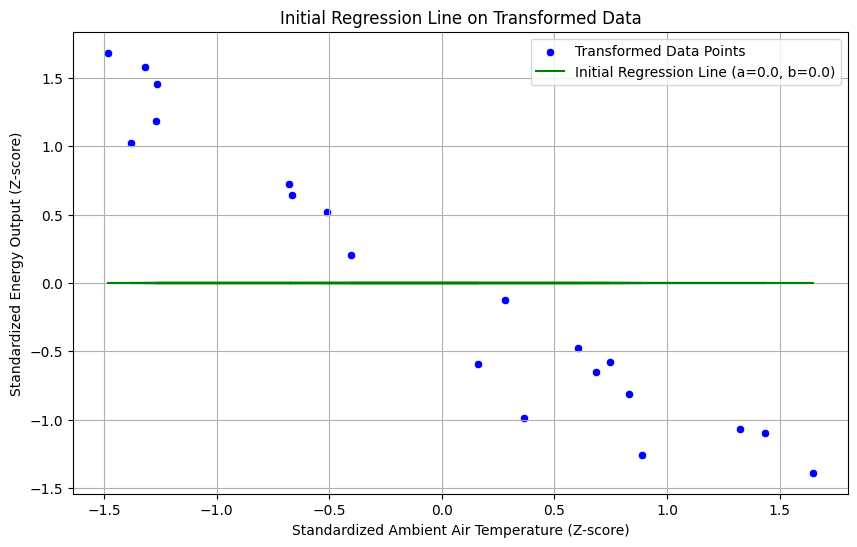

Partial Derivatives at Initial Parameters:
da (dJ/da): 1.9320
db (dJ/db): 0.0000

Updated Parameters after One Gradient Descent Iteration:
Slope (a): -0.1932
Intercept (b): -0.0000

New Cost after One Iteration: 0.6641
Has the cost decreased? Yes



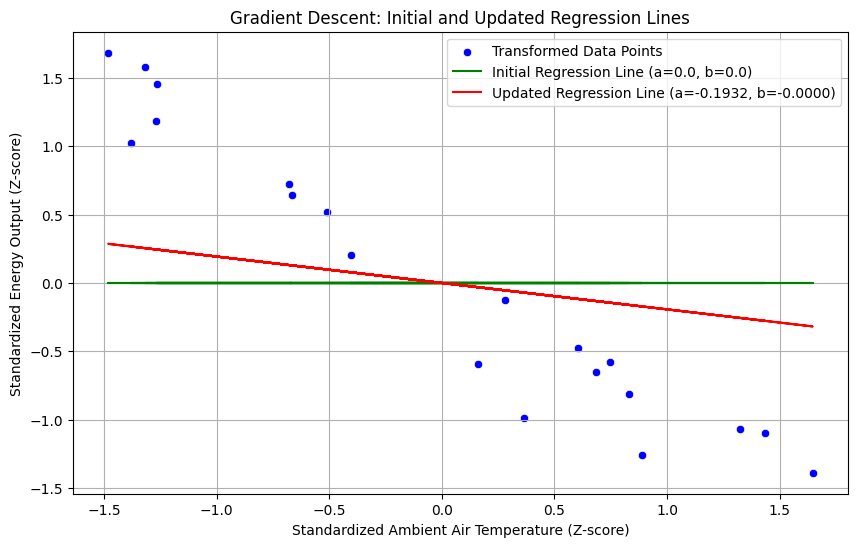

In [8]:
# Task 5: Perform One Iteration of Gradient Descent

# Choose arbitrary initial values for the regression parameters
a_initial = 0.0  # Initial slope
b_initial = 0.0  # Initial intercept

print(f"Initial Parameters:")
print(f"Slope (a): {a_initial}")
print(f"Intercept (b): {b_initial}\n")

# Define the learning rate (alpha)
alpha = 0.1  # You may adjust this value based on experimentation

# Compute the initial cost
initial_cost = compute_cost(a_initial, b_initial, X, Y)
print(f"Initial Cost: {initial_cost:.4f}")

# Plot the transformed data points and the initial regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='x', y='y', data=subset_scaled, color='blue', label='Transformed Data Points')

# Compute predictions with initial parameters
Y_pred_initial = a_initial * X + b_initial

# Plot the initial regression line
plt.plot(X, Y_pred_initial, color='green', label=f'Initial Regression Line (a={a_initial}, b={b_initial})')
plt.title('Initial Regression Line on Transformed Data')
plt.xlabel('Standardized Ambient Air Temperature (Z-score)')
plt.ylabel('Standardized Energy Output (Z-score)')
plt.legend()
plt.grid(True)
plt.show()

# Compute the gradients using the initial parameters
da, db = compute_gradients(a_initial, b_initial, X, Y)

print(f"Partial Derivatives at Initial Parameters:")
print(f"da (dJ/da): {da:.4f}")
print(f"db (dJ/db): {db:.4f}\n")

# Perform one iteration of gradient descent to update parameters
a_new = a_initial - alpha * da
b_new = b_initial - alpha * db

print(f"Updated Parameters after One Gradient Descent Iteration:")
print(f"Slope (a): {a_new:.4f}")
print(f"Intercept (b): {b_new:.4f}\n")

# Compute the new cost with updated parameters
new_cost = compute_cost(a_new, b_new, X, Y)
print(f"New Cost after One Iteration: {new_cost:.4f}")

# Check if the cost has decreased
cost_decreased = new_cost < initial_cost
print(f"Has the cost decreased? {'Yes' if cost_decreased else 'No'}\n")

# Plot the transformed data points, initial and updated regression lines
plt.figure(figsize=(10, 6))
sns.scatterplot(x='x', y='y', data=subset_scaled, color='blue', label='Transformed Data Points')

# Plot the initial regression line
plt.plot(X, Y_pred_initial, color='green', label=f'Initial Regression Line (a={a_initial}, b={b_initial})')

# Compute predictions with updated parameters
Y_pred_new = a_new * X + b_new

# Plot the updated regression line
plt.plot(X, Y_pred_new, color='red', label=f'Updated Regression Line (a={a_new:.4f}, b={b_new:.4f})')

plt.title('Gradient Descent: Initial and Updated Regression Lines')
plt.xlabel('Standardized Ambient Air Temperature (Z-score)')
plt.ylabel('Standardized Energy Output (Z-score)')
plt.legend()
plt.grid(True)
plt.show()


Convergence reached at iteration 1.

Final Parameters after 1 iterations:
Slope (a): -0.966002
Intercept (b): -0.000000


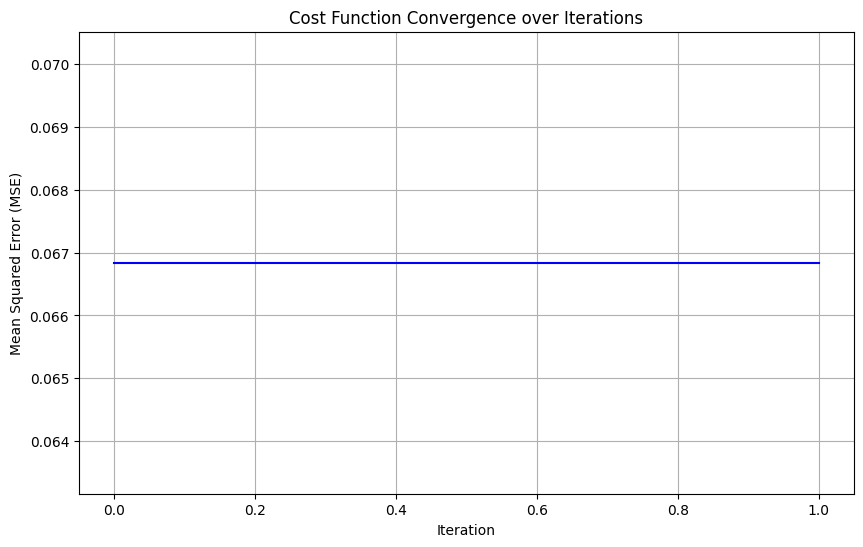

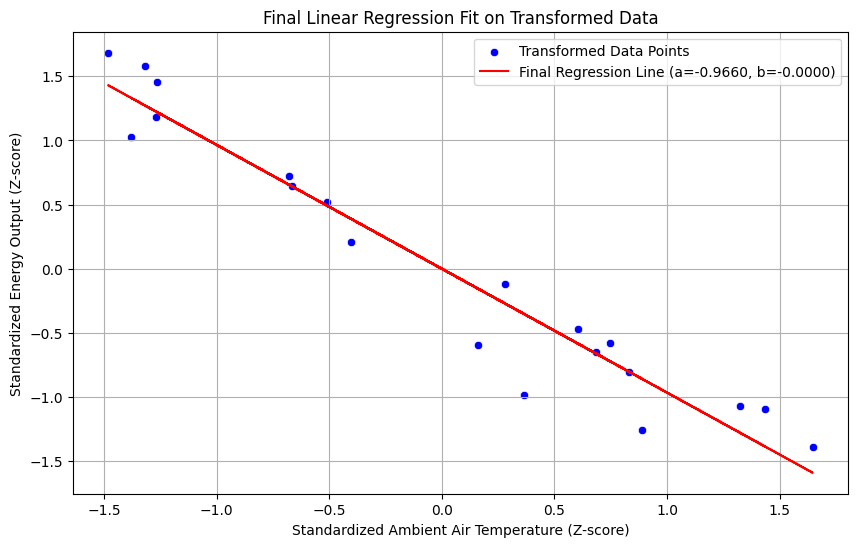

In [9]:
# Task 6: Iterative Gradient Descent with Backtracking Line Search

# Initialize parameters from Task 5
a = a_current  # Current slope from Task 5
b = b_current  # Current intercept from Task 5

# Define backtracking line search parameters
alpha_init = 1.0  # Initial step size
rho = 0.5         # Step size reduction factor
c = 1e-4          # Sufficient decrease parameter

# Define convergence criteria
tolerance = 1e-6  # Threshold for change in cost
max_iterations = 1000  # Maximum number of iterations to prevent infinite loops

# Initialize lists to store cost history
cost_history = [current_cost]
a_history = [a]
b_history = [b]

# Gradient Descent Iterative Optimization
for iteration in range(1, max_iterations + 1):
    # Compute gradients at current parameters
    da, db = compute_gradients(a, b, X, Y)
    
    # Initialize alpha for backtracking
    alpha = alpha_init
    
    # Compute the current cost
    current_cost = compute_cost(a, b, X, Y)
    
    # Compute the cost with the proposed step
    a_temp = a - alpha * da
    b_temp = b - alpha * db
    temp_cost = compute_cost(a_temp, b_temp, X, Y)
    
    # Backtracking line search to find suitable alpha
    while temp_cost > current_cost - c * alpha * (da**2 + db**2):
        alpha *= rho
        a_temp = a - alpha * da
        b_temp = b - alpha * db
        temp_cost = compute_cost(a_temp, b_temp, X, Y)
    
    # Update parameters
    a = a_temp
    b = b_temp
    
    # Compute the new cost
    new_cost = temp_cost
    
    # Store history
    cost_history.append(new_cost)
    a_history.append(a)
    b_history.append(b)
    
    # Check for convergence
    if abs(cost_history[-2] - cost_history[-1]) < tolerance:
        print(f"Convergence reached at iteration {iteration}.")
        break
    
    # Optionally, print progress every 100 iterations
    if iteration % 100 == 0:
        print(f"Iteration {iteration}: Cost = {new_cost:.6f}, Slope (a) = {a:.6f}, Intercept (b) = {b:.6f}")
else:
    print("Maximum iterations reached without full convergence.")

# Final Parameters
print(f"\nFinal Parameters after {iteration} iterations:")
print(f"Slope (a): {a:.6f}")
print(f"Intercept (b): {b:.6f}")

# Plot the cost function over all iterations
plt.figure(figsize=(10, 6))
plt.plot(cost_history, color='blue')
plt.title('Cost Function Convergence over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()

# Plot the final regression line against the transformed data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='x', y='y', data=subset_scaled, color='blue', label='Transformed Data Points')

# Compute predictions with final parameters
Y_pred_final = a * X + b

# Plot the final regression line
plt.plot(X, Y_pred_final, color='red', label=f'Final Regression Line (a={a:.4f}, b={b:.4f})')

plt.title('Final Linear Regression Fit on Transformed Data')
plt.xlabel('Standardized Ambient Air Temperature (Z-score)')
plt.ylabel('Standardized Energy Output (Z-score)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Task A.II.1: Differentiation of the Cost Function and Update Rules

# Given the cost function:
# J(theta) = (1/(4n)) * sum_{i=1}^n (y_i - (theta2 * x_i^2 + theta1 * x_i + theta0))^4

# Partial derivatives with respect to theta0, theta1, theta2:

# dJ/dtheta0 = -(1/n) * sum_{i=1}^n (y_i - h_theta(x_i))^3
# dJ/dtheta1 = -(1/n) * sum_{i=1}^n x_i * (y_i - h_theta(x_i))^3
# dJ/dtheta2 = -(1/n) * sum_{i=1}^n x_i^2 * (y_i - h_theta(x_i))^3

# Update rules for gradient descent:
# theta0 = theta0 - alpha * dJ/dtheta0
# theta1 = theta1 - alpha * dJ/dtheta1
# theta2 = theta2 - alpha * dJ/dtheta2

# Note:
# These update rules will be implemented in the gradient descent loop in Task A.II.2


Shape of X: (20,)
Shape of Y: (20,)
Shape of X_poly: (20, 3)
Iteration 200: Cost = 0.013722, Theta = [ 0.08797277 -0.63820228 -0.03548725]
Iteration 400: Cost = 0.005947, Theta = [ 0.10458155 -0.75198954 -0.07488145]
Iteration 600: Cost = 0.003725, Theta = [ 0.11481421 -0.81048046 -0.10391522]
Iteration 800: Cost = 0.002723, Theta = [ 0.1214378  -0.84823352 -0.12664001]
Iteration 1000: Cost = 0.002183, Theta = [ 0.12581879 -0.87515697 -0.14481383]
Maximum iterations reached without full convergence.

Final Parameters after 1000 iterations:
Theta2 (quadratic term): 0.125819
Theta1 (linear term): -0.875157
Theta0 (intercept): -0.144814


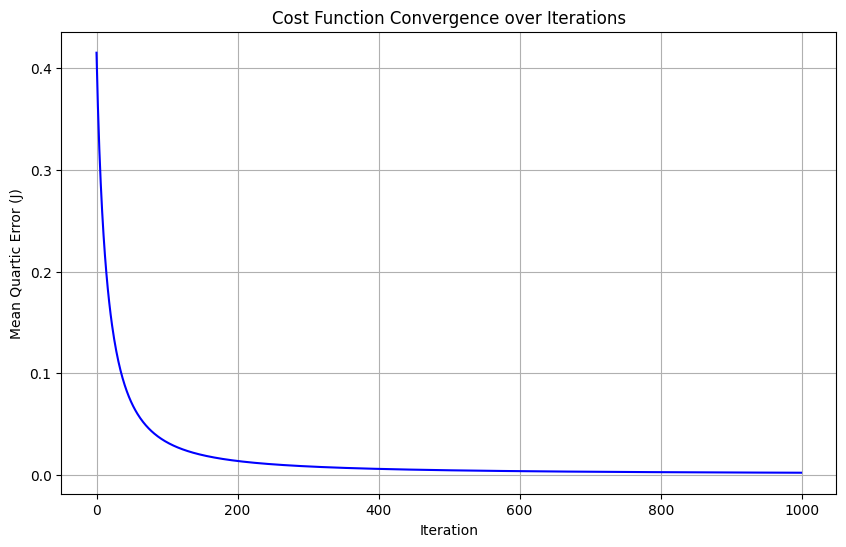

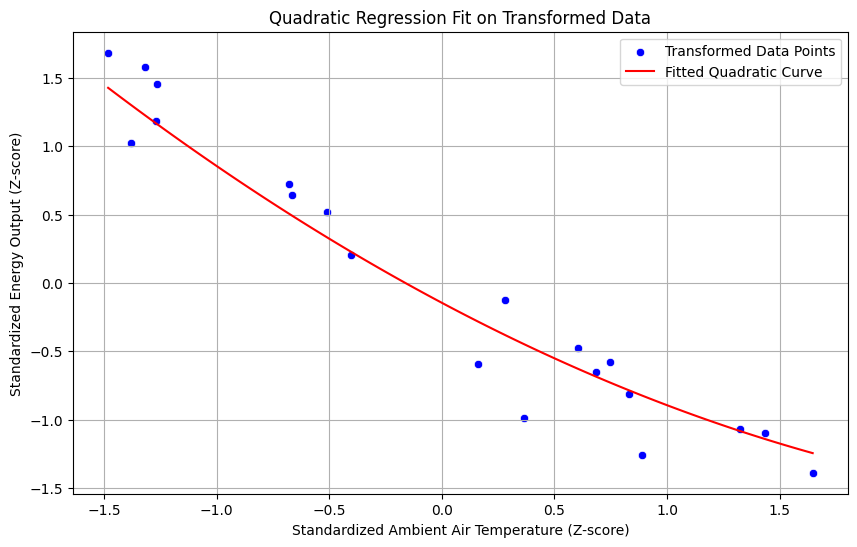

In [14]:
# Task A.II.2: Optimize Quadratic Model with Gradient Descent

# Extract X and Y as 1D arrays
X = subset_scaled['x'].values.flatten()  # Shape: (20,)
Y = subset_scaled['y'].values.flatten()  # Shape: (20,)

# Verify the shapes of X and Y
print(f"Shape of X: {X.shape}")  # Expected: (20,)
print(f"Shape of Y: {Y.shape}")  # Expected: (20,)

# Add polynomial feature x^2 and bias term
X_poly = np.column_stack((X**2, X, np.ones_like(X)))  # Shape: (20, 3)

# Verify the shape of X_poly
print(f"Shape of X_poly: {X_poly.shape}")  # Expected: (20, 3)

# Define the quartic cost function
def compute_cost_quartic(theta, X_poly, Y):
    """
    Compute the Mean Quartic Error (fourth power) cost function.
    
    Parameters:
    theta (numpy.ndarray): Parameter vector [theta2, theta1, theta0]
    X_poly (numpy.ndarray): Polynomial features [x^2, x, 1]
    Y (numpy.ndarray): Response variable
    
    Returns:
    float: The cost
    """
    predictions = X_poly.dot(theta)  # Shape: (20,)
    errors = Y - predictions         # Shape: (20,)
    cost = (1 / (4 * len(Y))) * np.sum(errors**4)
    return cost

# Define the gradients
def compute_gradients_quartic(theta, X_poly, Y):
    """
    Compute the gradients of the quartic cost function with respect to theta.
    
    Parameters:
    theta (numpy.ndarray): Parameter vector [theta2, theta1, theta0]
    X_poly (numpy.ndarray): Polynomial features [x^2, x, 1]
    Y (numpy.ndarray): Response variable
    
    Returns:
    numpy.ndarray: Gradient vector [dJ/dtheta2, dJ/dtheta1, dJ/dtheta0]
    """
    predictions = X_poly.dot(theta)  # Shape: (20,)
    errors = Y - predictions         # Shape: (20,)
    # Corrected gradient computation using dot product
    gradients = -(1 / len(Y)) * (errors**3).dot(X_poly)  # Shape: (3,)
    return gradients

# Initialize parameters arbitrarily
theta = np.array([0.0, 0.0, 0.0])  # Shape: (3,)

# Set hyperparameters
alpha = 0.01  # Learning rate
max_iterations = 1000
tolerance = 1e-6

# Initialize lists to store cost history
cost_history = []

# Gradient Descent Loop
for iteration in range(max_iterations):
    cost = compute_cost_quartic(theta, X_poly, Y)
    cost_history.append(cost)
    
    gradients = compute_gradients_quartic(theta, X_poly, Y)
    
    # Update parameters
    theta_new = theta - alpha * gradients
    
    # Compute new cost
    new_cost = compute_cost_quartic(theta_new, X_poly, Y)
    
    # Check for convergence
    if abs(new_cost - cost) < tolerance:
        theta = theta_new
        cost_history.append(new_cost)
        print(f"Convergence reached at iteration {iteration + 1}.")
        break
    
    theta = theta_new
    
    # Optional: Print progress every 200 iterations
    if (iteration + 1) % 200 == 0:
        print(f"Iteration {iteration + 1}: Cost = {new_cost:.6f}, Theta = {theta}")
else:
    print("Maximum iterations reached without full convergence.")

# Final Parameters
theta2, theta1, theta0 = theta
print(f"\nFinal Parameters after {iteration + 1} iterations:")
print(f"Theta2 (quadratic term): {theta2:.6f}")
print(f"Theta1 (linear term): {theta1:.6f}")
print(f"Theta0 (intercept): {theta0:.6f}")

# Plot the cost function over iterations
plt.figure(figsize=(10, 6))
plt.plot(cost_history, color='blue')
plt.title('Cost Function Convergence over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Mean Quartic Error (J)')
plt.grid(True)
plt.show()

# Plot the transformed data points and the fitted quadratic curve
plt.figure(figsize=(10, 6))
sns.scatterplot(x=subset_scaled['x'], y=subset_scaled['y'], color='blue', label='Transformed Data Points')

# Generate a range of x values for plotting the quadratic curve
x_vals = np.linspace(subset_scaled['x'].min(), subset_scaled['x'].max(), 100)
x_poly_vals = np.column_stack((x_vals**2, x_vals, np.ones_like(x_vals)))
y_vals = x_poly_vals.dot(theta)

# Plot the quadratic regression line
plt.plot(x_vals, y_vals, color='red', label='Fitted Quadratic Curve')
plt.title('Quadratic Regression Fit on Transformed Data')
plt.xlabel('Standardized Ambient Air Temperature (Z-score)')
plt.ylabel('Standardized Energy Output (Z-score)')
plt.legend()
plt.grid(True)
plt.show()
